# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

- 10개의 범주(category)  : **label은 0~9 정수**
- 70,000개의 **흑백 이미지**로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋.
- 해상도(**28x28 픽셀**)



<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [1]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms # built-in dataset
from torchinfo import summary 

import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)



cpu


In [2]:
!pip install torchinfo

# 1. 데이터 준비

In [3]:
# 1. Dataset 생성 - Built-in Dataset
# built-in dataset 다운받을 경로 

root_path = r"C:\Classes\deeplearning\datasets"
trainset= datasets.FashionMNIST(
    root= root_path, train = True, download=True, transform = transforms.ToTensor()
)

testset = datasets.FashionMNIST(
    root=root_path, train= False, download= True, transform =transforms.ToTensor()
)

In [4]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Classes\deeplearning\datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
# Validation set을 trainset으로부터 생성
trainset, validset = torch.utils.data.random_split(trainset, [50000,10000])
len(trainset),len(validset),len(testset)

(50000, 10000, 10000)

In [6]:
trainset

In [7]:
testset.classes
testset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

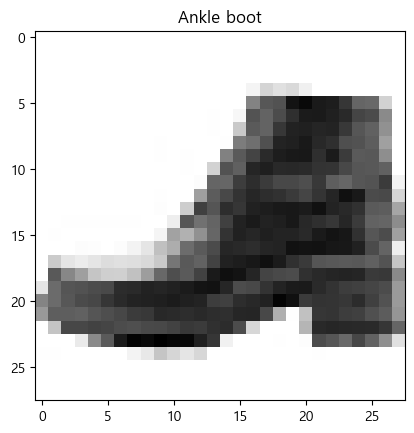

In [8]:
# 입력 이미지 확인
idx = 1187
x, y = testset[idx]
plt.imshow(x.squeeze(), cmap="Greys")   # 차원이 1인 축 제거
plt.title(f"{testset.classes[y]}")
plt.show()

In [9]:
### DataLoader 생성

train_loader = DataLoader(trainset, 128, shuffle = True, drop_last =True) 
valid_loader = DataLoader(validset, 128)
test_loader = DataLoader(testset, 128)

In [10]:
print(trainset[0][0].shape)  # x shape
trainset[0][1]  #y

torch.Size([1, 28, 28])


8

In [11]:
########## 모델 정의 
class FashionMNISTModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(1*28*28, 1024) # in_features : 입력 데이터의 feature 수
        self.lr2 = nn.Linear(1024, 512)
        self.lr3 = nn.Linear(512, 256)
        self.lr4 = nn.Linear(256, 128)
        self.lr5 = nn.Linear(128, 64)
        self.lr6 = nn.Linear(64,10) # 다중분류 ; y의 class 개수
        self.relu = nn.ReLU()

    def forward(self, X):
        # X.shape : (batch, channel, h, w) -> 입력(1차원 ) - Linear
        # X.shape을 1차원을 (batch축 유지하고 1차원으로)
        # out = torch.flatten(X, start_dim=1)
        out = nn.Flatten()(X)
        out = self.relu(self.lr1(out))
        out = self.relu(self.lr2(out))
        out = self.relu(self.lr3(out))
        out = self.relu(self.lr4(out))
        out = self.relu(self.lr5(out))
        out = self.lr6(out)
        return out
        

In [12]:
f_model = FashionMNISTModel()
print(f_model)

FashionMNISTModel(
  (lr1): Linear(in_features=784, out_features=1024, bias=True)
  (lr2): Linear(in_features=1024, out_features=512, bias=True)
  (lr3): Linear(in_features=512, out_features=256, bias=True)
  (lr4): Linear(in_features=256, out_features=128, bias=True)
  (lr5): Linear(in_features=128, out_features=64, bias=True)
  (lr6): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [13]:
summary(f_model,(128,1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [128, 10]                 --
├─Linear: 1-1                            [128, 1024]               803,840
├─ReLU: 1-2                              [128, 1024]               --
├─Linear: 1-3                            [128, 512]                524,800
├─ReLU: 1-4                              [128, 512]                --
├─Linear: 1-5                            [128, 256]                131,328
├─ReLU: 1-6                              [128, 256]                --
├─Linear: 1-7                            [128, 128]                32,896
├─ReLU: 1-8                              [128, 128]                --
├─Linear: 1-9                            [128, 64]                 8,256
├─ReLU: 1-10                             [128, 64]                 --
├─Linear: 1-11                           [128, 10]                 650
Total params: 1,501,770
Trainable params: 1,501,770
Non-traina

In [14]:
# dummy data를 이용해서 추론 (model에 입력-> 결과 확인)
with torch.no_grad():
    sample = torch.ones((2,1,28,28), dtype = torch.float32) # 2개 이미지
    y_hat = f_model(sample)
    print(y_hat.shape)

torch.Size([2, 10])


In [15]:
y_hat[0]
# class별 정답 여부값
i = y_hat[0].argmax(dim=-1) # 마지막 차원 
i, testset.classes[i.item()]

(tensor(4), 'Coat')

In [16]:
### 정확도
y = torch.tensor([1,4])
pred = y_hat.argmax(dim=-1)
torch.sum(y==pred).item()

1

In [17]:
proba=  nn.Softmax(dim=-1)(y_hat) # 다중 분류 확률 softmax : 값의 범위 0-1, 값의 합: 1
proba
proba.sum(dim=-1) #확률 다 합치면 1

tensor([1.0000, 1.0000])

In [18]:
###########################
# 학습 + 검증
###########################
# 하이퍼파라미터
LR = 0.001
EPOCHS = 20

# train -> model, loss_fn, optimizer
model = FashionMNISTModel().to(device)
# 다중분류 : CrossEntropyLoss()(pred, y) - pred : softmax 통과x ,y : one-hot encoding
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr= LR)


In [19]:
######### 학습 - train loss, validation loss, validation accuracy
import time
train_loss_list = []
valid_loss_list = []
valid_acc_list = []

s = time.time()
for epoch in range(EPOCHS):
    # 한 epoch 학습+검증
    ##################################train
    # 1. train 모드
    model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        # 2. device옮기기
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 3. 모델 추정
        pred_train = model(X_train)
        # 4. loss 계산
        loss = loss_fn(pred_train, y_train)
        # 5. 파라미터들의 gradient 계산
        loss.backward()
        # 6. 파라미터 업데이터
        optimizer.step()
        # 7. 파라미터 초기화
        optimizer.zero_grad()
        # loss 누적
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    ################################## validation
    #1. eval 모드
    model.eval()
    val_loss= 0.0
    val_acc = 0.0
    with torch.no_grad():
        for X_val, y_val in test_loader:
            #2. device옮기기
            X_val, y_val = X_val.to(device), y_val.to(device)
            # 3. 추론
            pred_val = model(X_val)
            # 4. 검증
            loss = loss_fn(pred_val, y_val)
            val_loss+=loss.item()

            # 정확도 
            pred_class = pred_val.argmax(dim =-1)
            val_acc += torch.sum(y_val == pred_class).item()
        val_loss /= len(test_loader)
        val_acc = val_acc / len(test_loader.dataset) # DataLoader.dataset : dataset을 반환    
        valid_loss_list.append(val_loss)
        valid_acc_list.append(val_acc)
    print(f"[{epoch:04d}/{EPOCHS}] train loss : {train_loss}, valid loss : {val_loss}, valid acc : {val_acc}")

e= time.time()
print(f"학습에 걸린 시간 : {e-s}초")

[0000/20] train loss : 0.6704653979876103, valid loss : 0.47858610221102266, valid acc : 0.8289
[0001/20] train loss : 0.40929197241098453, valid loss : 0.3969121188679828, valid acc : 0.8551
[0002/20] train loss : 0.36164130706053516, valid loss : 0.4278428520582899, valid acc : 0.8468
[0003/20] train loss : 0.33053305920882103, valid loss : 0.3577569858937324, valid acc : 0.8734
[0004/20] train loss : 0.30969638713659386, valid loss : 0.3820058213004583, valid acc : 0.8642
[0005/20] train loss : 0.29235067266302234, valid loss : 0.3606687531441073, valid acc : 0.8722
[0006/20] train loss : 0.2803544016984793, valid loss : 0.33945350877091857, valid acc : 0.8765
[0007/20] train loss : 0.2627343286688511, valid loss : 0.3568407093422322, valid acc : 0.8772
[0008/20] train loss : 0.25447133065034183, valid loss : 0.3459293393394615, valid acc : 0.884
[0009/20] train loss : 0.24539017249376346, valid loss : 0.3486126908395864, valid acc : 0.8791
[0010/20] train loss : 0.2359940388836922,

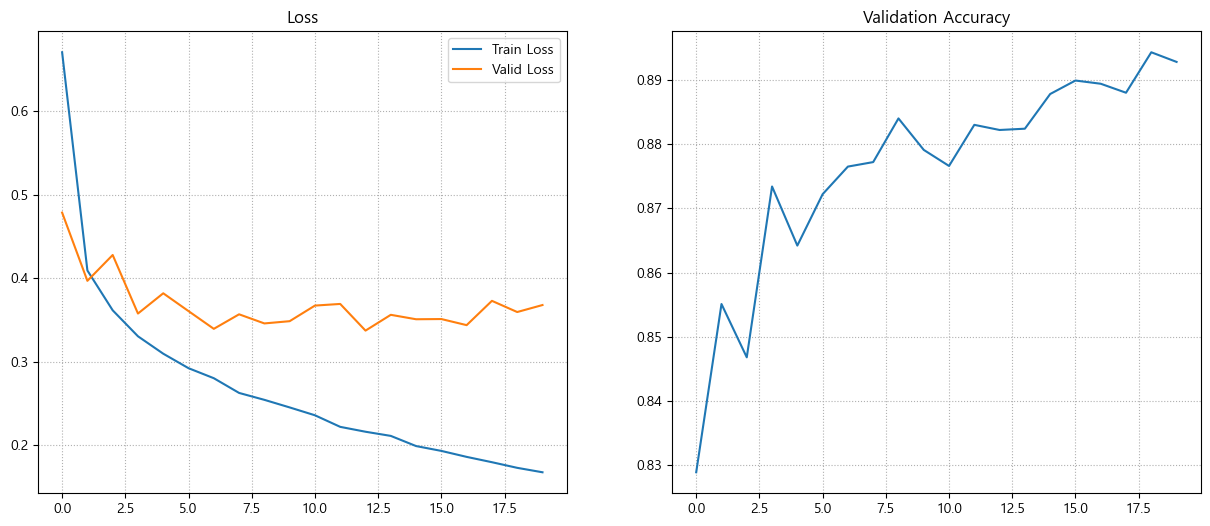

In [20]:
# 학습 결과 시각화
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), train_loss_list, label = "Train Loss")
plt.plot(range(EPOCHS), valid_loss_list, label = "Valid Loss")
plt.title("Loss")
plt.legend()
plt.grid(True, linestyle = ":")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), valid_acc_list)
plt.title("Validation Accuracy")
plt.grid(True, linestyle = ":")

plt.show()

In [23]:
np.argmin(valid_loss_list) 
valid_loss_list[12] # 모델 성능이 가장 좋을 때의 valid_loss

0.3373298673312875

# 모델저장
- 학습 도중 성능이 개선될 때 마다 저장
  - 조기종료 Early stopping 같이 처리  -> 특정 epoch 수가 지나도 성능개선 안되면 학습 중단

In [25]:
import time

lr = 0.001
epochs = 100 # epoch 수를 최대한 길게 잡음

model = FashionMNISTModel().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)

###################################
# 조기 종료 + 모델 저장을 위한 설정(변수) 추가 
# 조기종료 기준 평가 지표 ; validation loss
###################################
#가장 성능 좋았을 때의 validation loss 저장
best_score = torch.inf # loss 작을 수록 좋으므로 가장 안좋은 loss 값으로 초기화
save_path = "saved_models/fashion_mnist_model.pth"
# patience epoch 동안 성능이 개선되지 않으면 조기 종료
patience = 5 
# 성능 개선 되는 지를 몇 번째 기다리는지 저장할 변수
trigger_count = 0 # if trigger_count == patience : 조기종료 

#################################
# epoch 별 학습+검증 결과를 저장할 리스트 
train_loss_list = []
valid_loss_list = []
valid_acc_list = []

s = time.time()
for epoch in range(epochs):
    ##################################train
    # 1. train 모드
    model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        # 2. device옮기기
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 3. 모델 추정
        pred_train = model(X_train)
        # 4. loss 계산
        loss = loss_fn(pred_train, y_train)
        # 5. 파라미터들의 gradient 계산
        loss.backward()
        # 6. 파라미터 업데이터
        optimizer.step()
        # 7. 파라미터 초기화
        optimizer.zero_grad()
        # loss 누적
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    ################################## validation
    #1. eval 모드
    model.eval()
    val_loss= 0.0
    val_acc = 0.0
    with torch.no_grad():
        for X_val, y_val in test_loader:
            #2. device옮기기
            X_val, y_val = X_val.to(device), y_val.to(device)
            # 3. 추론
            pred_val = model(X_val)
            # 4. 검증
            loss = loss_fn(pred_val, y_val)
            val_loss+=loss.item()

            # 정확도 
            pred_class = pred_val.argmax(dim =-1)
            val_acc += torch.sum(y_val == pred_class).item()
        val_loss /= len(test_loader)
        val_acc = val_acc / len(test_loader.dataset) # DataLoader.dataset : dataset을 반환    
        valid_loss_list.append(val_loss)
        valid_acc_list.append(val_acc)
    print(f"[{epoch:04d}/{EPOCHS}] train loss : {train_loss}, valid loss : {val_loss}, valid acc : {val_acc}")

    # 한 epoch에 대한 학습 +검증 완료
    ###############################################3
    # 저장 + 조기종료
    ##  모델 저장 여부 체크 후 성능 개선 됐으면 저장 
    if val_loss < best_score: # 성능 개선 됨
        print(f">>>>>>>>모델 저장 : {epoch+1} epoch - best valid loss : {best_score:.5f}, 현재 valid_loss:{val_loss:.5f}")
        best_score= val_loss 
        # 모델 저장 
        torch.save(model, save_path)
        #### 조기종료 trigger_count = 0으로 초기화
        trigger_count = 0
    else: # 성능 개선 안됨
        ### trigger_count 를 1 증가
        trigger_count += 1
        if patience == trigger_count:
            print(f"<<<<<<<<{epoch+1} epoch에서 조기종료 - best validation loss :{best_score:.5f}에서 개선 안됨>>>>>>>>")
            break
    
e= time.time()
print(f"학습에 걸린 시간 : {e-s}초")

[0000/20] train loss : 0.6513276304954138, valid loss : 0.48938082139703293, valid acc : 0.8227
>>>>>>>>모델 저장 : 1 epoch - best valid loss : inf, 현재 valid_loss:0.48938082139703293
[0001/20] train loss : 0.414795019916999, valid loss : 0.4130299542146393, valid acc : 0.8489
>>>>>>>>모델 저장 : 2 epoch - best valid loss : 0.48938, 현재 valid_loss:0.4130299542146393
[0002/20] train loss : 0.35924474470890483, valid loss : 0.4080810473312306, valid acc : 0.8552
>>>>>>>>모델 저장 : 3 epoch - best valid loss : 0.41303, 현재 valid_loss:0.4080810473312306
[0003/20] train loss : 0.3310528237468157, valid loss : 0.3695586868856527, valid acc : 0.8694
>>>>>>>>모델 저장 : 4 epoch - best valid loss : 0.40808, 현재 valid_loss:0.3695586868856527
[0004/20] train loss : 0.31269433475457703, valid loss : 0.3747085225355776, valid acc : 0.8679
[0005/20] train loss : 0.2929981532005163, valid loss : 0.34498280456549, valid acc : 0.8768
>>>>>>>>모델 저장 : 6 epoch - best valid loss : 0.36956, 현재 valid_loss:0.34498280456549
[0006

In [26]:
##### 저장된 모델(best score)로 testset 최종 평가
# 저장 모델 loading 
best_model = torch.load(save_path)
best_model = best_model.to(device)
# eval 모드 변경
best_model.eval()

# 평가 결과를 저장할 변수
test_loss =0.0
test_acc = 0.0
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        pred_test = model(X_test)
        loss = loss_fn(pred_test, y_test)
        test_loss += loss.item()
        pred_class = pred_test.argmax(dim =-1)
        test_acc = test_acc + torch.sum(y_test == pred_class).item()

    # 검증 완료
    test_loss = test_loss / len(test_loader)
    test_acc= test_acc/len(test_loader.dataset)

In [30]:
print(f"최종 평가 결과 - loss : {test_loss}, accuracy : {test_acc}")

최종 평가 결과 - loss : 0.37645651730178276, accuracy : 0.8852


# 새로운 데이터로 추정

In [36]:
new_data = torch.empty(3,1,28,28)

new_data[0] = testset[0][0] # 1번 데이터의  X
new_data[0] = testset[1][0]
new_data[0] = testset[2][0]

In [37]:
with torch.no_grad():
    y_hat= best_model(new_data)

In [41]:
print("추론 라벨")
labels = y_hat.argmax(dim=-1)
proba = y_hat.softmax(dim=-1) # 0~9 클래스 해당할 확률
max_proba = proba.max(dim=-1).values

for i, label in enumerate(labels):
    print(f"{label} - {testset.classes[label]}, {max_proba[i]*100:.2f}%")

추론 라벨
1 - Trouser, 100.00%
5 - Sandal, 98.67%
5 - Sandal, 98.67%


In [46]:
proba.max(dim=-1) # 축 지정

torch.return_types.max(
values=tensor([1.0000, 0.9867, 0.9867]),
indices=tensor([1, 5, 5]))